In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from typing import Generator, Tuple
from sklearn.preprocessing import MinMaxScaler

#FUNCIONES PROPIAS

In [2]:
def accuracy(matriz_conf:np.ndarray)->float:
  """
  Toma una matriz de confusión y devuelve la accuracy.
  PARÁMETROS:
  matriz_conf: np.array
    Matriz de confusión.
  RETURN:
  accuracy: float

  """
  tp = matriz_conf[0,0]
  tn = matriz_conf[1,1]
  fp = matriz_conf[1,0]
  fn = matriz_conf[0,1]
  return (tp+tn)/(tp+tn+fp+fn)

In [3]:
def recall(matriz_conf:np.ndarray)->float:
  """
  Toma una matriz de confusión y devuelve el recall.
  PARÁMETROS:
  matriz_conf: np.array
    Matriz de confusión.
  RETURN:
  recall: float
  """
  tp = matriz_conf[0,0]
  fn = matriz_conf[0,1]
  return tp/(tp+fn)

In [4]:
def precision(matriz_conf:np.ndarray)->float:
  """
  Toma una matriz de confusión y devuelve la precisión.
  PARÁMETROS:
  matriz_conf: np.array
    Matriz de confusión.
  RETURN:
  precision: float
  """
  tp = matriz_conf[0,0]
  fp = matriz_conf[1,0]
  return tp/(tp+fp) if (tp + fp) > 0 else 0

In [5]:
def especifidad(matriz_conf:np.ndarray)->float:
  """
  Toma una matriz de confusión y devuelve la especifidad.
  PARÁMETROS:
  matriz_conf: np.array
    Matriz de confusión.
  RETURN:
  especifidad: float
  """
  tn = matriz_conf[1,1]
  fp = matriz_conf[1,0]
  return tn/(tn+fp)

#SECCIÓN 1:
## Tratamiento de datos

In [13]:
datos= pd.read_csv('pd_speech_features.csv').astype(float).drop(columns=["id"])
datos.rename(columns={"class": "status"}, inplace=True)
datos.head(10)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,status
0,1.0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1.0
1,1.0,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1.0
2,1.0,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1.0
3,0.0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1.0
4,0.0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1.0
5,0.0,0.50780,0.78744,0.65451,226.0,221.0,0.007631,0.002696,0.00783,0.000060,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1.0
6,1.0,0.76095,0.62145,0.54543,322.0,321.0,0.005991,0.000107,0.00222,0.000013,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1.0
7,1.0,0.83671,0.62079,0.51179,318.0,317.0,0.006074,0.000136,0.00282,0.000017,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1.0
8,1.0,0.80826,0.61766,0.50447,318.0,317.0,0.006057,0.000069,0.00161,0.000010,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1.0
9,0.0,0.85302,0.62247,0.54855,493.0,492.0,0.003910,0.000040,0.00075,0.000003,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1.0


status
1.0    564
0.0    192
Name: count, dtype: int64
----En proporción----
status
1.0    0.746032
0.0    0.253968
Name: proportion, dtype: float64


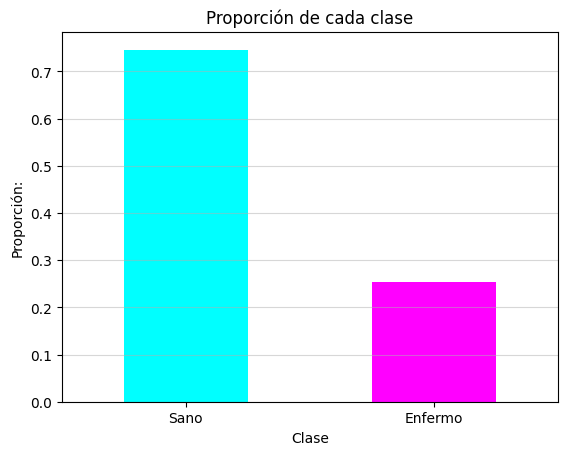

In [14]:
cantidades = datos["status"].value_counts(normalize = False)
proporciones = datos["status"].value_counts(normalize = True)
print(cantidades)
print("----En proporción----")
print(proporciones)
plt.title("Proporción de cada clase")
proporciones.plot(kind = "bar", color =["cyan", "magenta"])#, label = "Sano")
plt.xlabel("Clase")
plt.ylabel("Proporción:")
plt.xticks(np.arange(2), ["Sano", "Enfermo"], rotation = 0)
#plt.yticks(np.arange(0, 0.8, 0.05))
plt.grid(axis ="y", alpha = 0.5)
plt.show()

La proporción es 75% - 25% por lo que hay desbalanceo moderado

In [15]:
df = datos.astype(str)

# Fila que contiene al menos un "?" en alguna celda
df_con_interrogacion = df[df.apply(lambda fila: fila.str.contains(r"\?").any(), axis=1)]

# Fila que NO contiene ningún "?" en ninguna celda
df_sin_interrogacion = df[~df.apply(lambda fila: fila.str.contains(r"\?").any(), axis=1)]

print(f"Filas con '?': {len(df_con_interrogacion)}")
print(f"Filas sin '?': {len(df_sin_interrogacion)}")

Filas con '?': 0
Filas sin '?': 756


No hay '?'

#KFOLD

In [16]:
X = datos.drop(columns=["status"])
y = datos["status"]

def cross_5x2(X: pd.DataFrame, y: pd.Series, random_state: int = 42)->Tuple:
    """
    Aplica 5x2 cross-validation: 5 repeticiones de 2 folds.
    En cada repetición, se hace un train/test split 50/50, y después se  intercambian los roles.

    RETURN:
    - ac_proms: Métricas de accuracy promedio (5,)
    - rec_proms: Recall promedio (5,)
    - pres_proms: Precisión promedio (5,)
    - esp_proms: Especificidad promedio (5,)
    """
    from sklearn.model_selection import train_test_split

    accuracys = np.zeros((10, 5))
    recalls = np.zeros((10, 5))
    precisions = np.zeros((10, 5))
    especificidades = np.zeros((10, 5))

    for rep in range(5):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, stratify=y, random_state=random_state + rep)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        for flip in range(2):
            # Si flip == 1, intercambiamos train y test
            if flip == 1:
                X_train, X_test = X_test, X_train
                y_train, y_test = y_test, y_train

            #------MODELOS------#
            #MLPDL
            mlp = MLPClassifier(
                hidden_layer_sizes=(80, 60, 40), activation='relu',
                learning_rate_init=0.01, max_iter=1000, random_state=random_state + rep)
            #MLP
            perceptron = MLPClassifier(
                hidden_layer_sizes=(100,), activation='relu',
                learning_rate='adaptive', learning_rate_init=0.01,
                max_iter=1000, random_state=random_state + rep)
            #KNNS
            knn_3 = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
            knn_5 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
            knn_27 = KNeighborsClassifier(n_neighbors=27, metric="euclidean")

            modelos = [mlp, perceptron, knn_3, knn_5, knn_27]
            idx = rep * 2 + flip

            for j, modelo in enumerate(modelos):
                modelo.fit(X_train, y_train)
                y_pred = np.where(modelo.predict_proba(X_test)[:, 0] >= 0.1, 0, 1)
                matriz_conf = confusion_matrix(y_test, y_pred)
                accuracys[idx, j] = accuracy(matriz_conf)
                recalls[idx, j] = recall(matriz_conf)
                precisions[idx, j] = precision(matriz_conf)
                especificidades[idx, j] = especifidad(matriz_conf)

    ac_proms = np.mean(accuracys, axis=0)
    rec_proms = np.mean(recalls, axis=0)
    pres_proms = np.mean(precisions, axis=0)
    esp_proms = np.mean(especificidades, axis=0)

    return (ac_proms, rec_proms, pres_proms, esp_proms)

In [17]:
accuracys = np.zeros((30, 5))
recalls = np.zeros((30, 5))
precisions = np.zeros((30, 5))
especificidades = np.zeros((30, 5))
for i in range(30):
  accuracys[i], recalls[i], precisions[i], especificidades[i] = cross_5x2(X, y, random_state=i)

In [18]:
#mlp, perceptron, knn3, knn5, knn7
columnas = ["Accuracy", "Recall", "Precision", "Especificidad"]
tablas = []
for i in range(5):
  tabla_knn_27 = pd.DataFrame(np.array([accuracys[:, i], recalls[:, i], precisions[:, i],
                                   especificidades[:, i]]).T, columns = columnas, index = np.arange(1, 31))
  tabla_knn_27.index.name = "Corrida"
  tabla_knn_27.loc["Máx."] = tabla_knn_27.max()
  tabla_knn_27.loc["Mín."] = tabla_knn_27.min()
  tabla_knn_27.loc["Prom."] = tabla_knn_27.mean()
  tabla_knn_27.loc["Std."] = tabla_knn_27.std()
  tablas.append(tabla_knn_27)


In [19]:
print("-------------------------MLP-------------------------")
tablas[0].tail(10)

-------------------------MLP-------------------------


,Accuracy,Recall,Precision,Especificidad
Corrida,,,,
25,0.753704,0.806250,0.543418,0.735816
26,0.765608,0.780208,0.557955,0.760638
27,0.738889,0.783333,0.548847,0.723759
28,0.716138,0.805208,0.516862,0.685816
29,0.727249,0.801042,0.534528,0.702128
30,0.709788,0.813542,0.510878,0.674468
Máx.,0.768254,0.873958,0.593595,0.793262
Mín.,0.621429,0.694792,0.446647,0.545035
Prom.,0.722545,0.802279,0.522650,0.695700


In [20]:
print("---------------------PERCEPTRON----------------------")
tablas[1].tail(10)

---------------------PERCEPTRON----------------------


,Accuracy,Recall,Precision,Especificidad
Corrida,,,,
25,0.794709,0.813542,0.583227,0.788298
26,0.786243,0.820833,0.565061,0.774468
27,0.805291,0.797917,0.593302,0.807801
28,0.802116,0.793750,0.589123,0.804965
29,0.802910,0.800000,0.589139,0.803901
30,0.808995,0.779167,0.599762,0.819149
Máx.,0.824603,0.820833,0.636177,0.842553
Mín.,0.737831,0.752083,0.554073,0.728723
Prom.,0.796106,0.776693,0.598150,0.803103


In [21]:
print("------------------------KNN3-------------------------")
tablas[2].tail(10)

------------------------KNN3-------------------------


,Accuracy,Recall,Precision,Especificidad
Corrida,,,,
25,0.782275,0.920833,0.542900,0.735106
26,0.777513,0.912500,0.537211,0.731560
27,0.780423,0.908333,0.540870,0.736879
28,0.785185,0.908333,0.547359,0.743262
29,0.785979,0.907292,0.548346,0.744681
30,0.786772,0.894792,0.550842,0.750000
Máx.,0.799206,0.938542,0.564405,0.762411
Mín.,0.777513,0.894792,0.537211,0.731560
Prom.,0.789534,0.918392,0.552435,0.745811


In [22]:
print("------------------------KNN5-------------------------")
tablas[3].tail(10)

------------------------KNN5-------------------------


,Accuracy,Recall,Precision,Especificidad
Corrida,,,,
25,0.688889,0.964583,0.448345,0.595035
26,0.680423,0.960417,0.441307,0.585106
27,0.683069,0.959375,0.443294,0.589007
28,0.684392,0.954167,0.444193,0.592553
29,0.683862,0.952083,0.443628,0.592553
30,0.686243,0.937500,0.445033,0.600709
Máx.,0.698413,0.972917,0.457140,0.606738
Mín.,0.677513,0.937500,0.438680,0.582270
Prom.,0.686078,0.958626,0.445813,0.593141


In [23]:
print("------------------------KNN27-------------------------")
tablas[4].tail(10)

------------------------KNN27-------------------------


,Accuracy,Recall,Precision,Especificidad
Corrida,,,,
25,0.496296,0.996875,0.335855,0.325887
26,0.498413,0.989583,0.335789,0.331206
27,0.496296,0.990625,0.335069,0.328014
28,0.494180,0.985417,0.333389,0.326950
29,0.494180,0.983333,0.333273,0.327660
30,0.500265,0.972917,0.334931,0.339362
Máx.,0.503175,0.996875,0.337592,0.340071
Mín.,0.488095,0.970833,0.329515,0.321277
Prom.,0.496991,0.982161,0.334030,0.331904


In [24]:
nombres = ["MLP", "Perceptron", "KNN3", "KNN5", "KNN27"]
from google.colab import files
for i in range(5):
  nombre_archivo = f"ds2_{nombres[i]}_5x2.csv"
  tablas[i].to_csv(nombre_archivo)
  files.download(nombre_archivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>